# Tratamento de dados

### Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings('ignore')

### Importando os dados

In [ ]:
df = pd.read_csv('/content/base.csv')
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,...,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Analisando os dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [ ]:
df.describe()

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Análise exploratória

### Distribuição da variável valor de venda

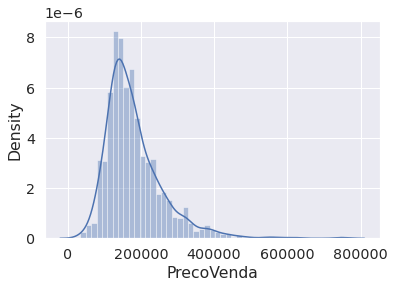

In [ ]:
sns.set(font_scale = 1.3)
sns.distplot(df['PrecoVenda']) 
plt.show()

### Matriz de correlação entre as features continuas

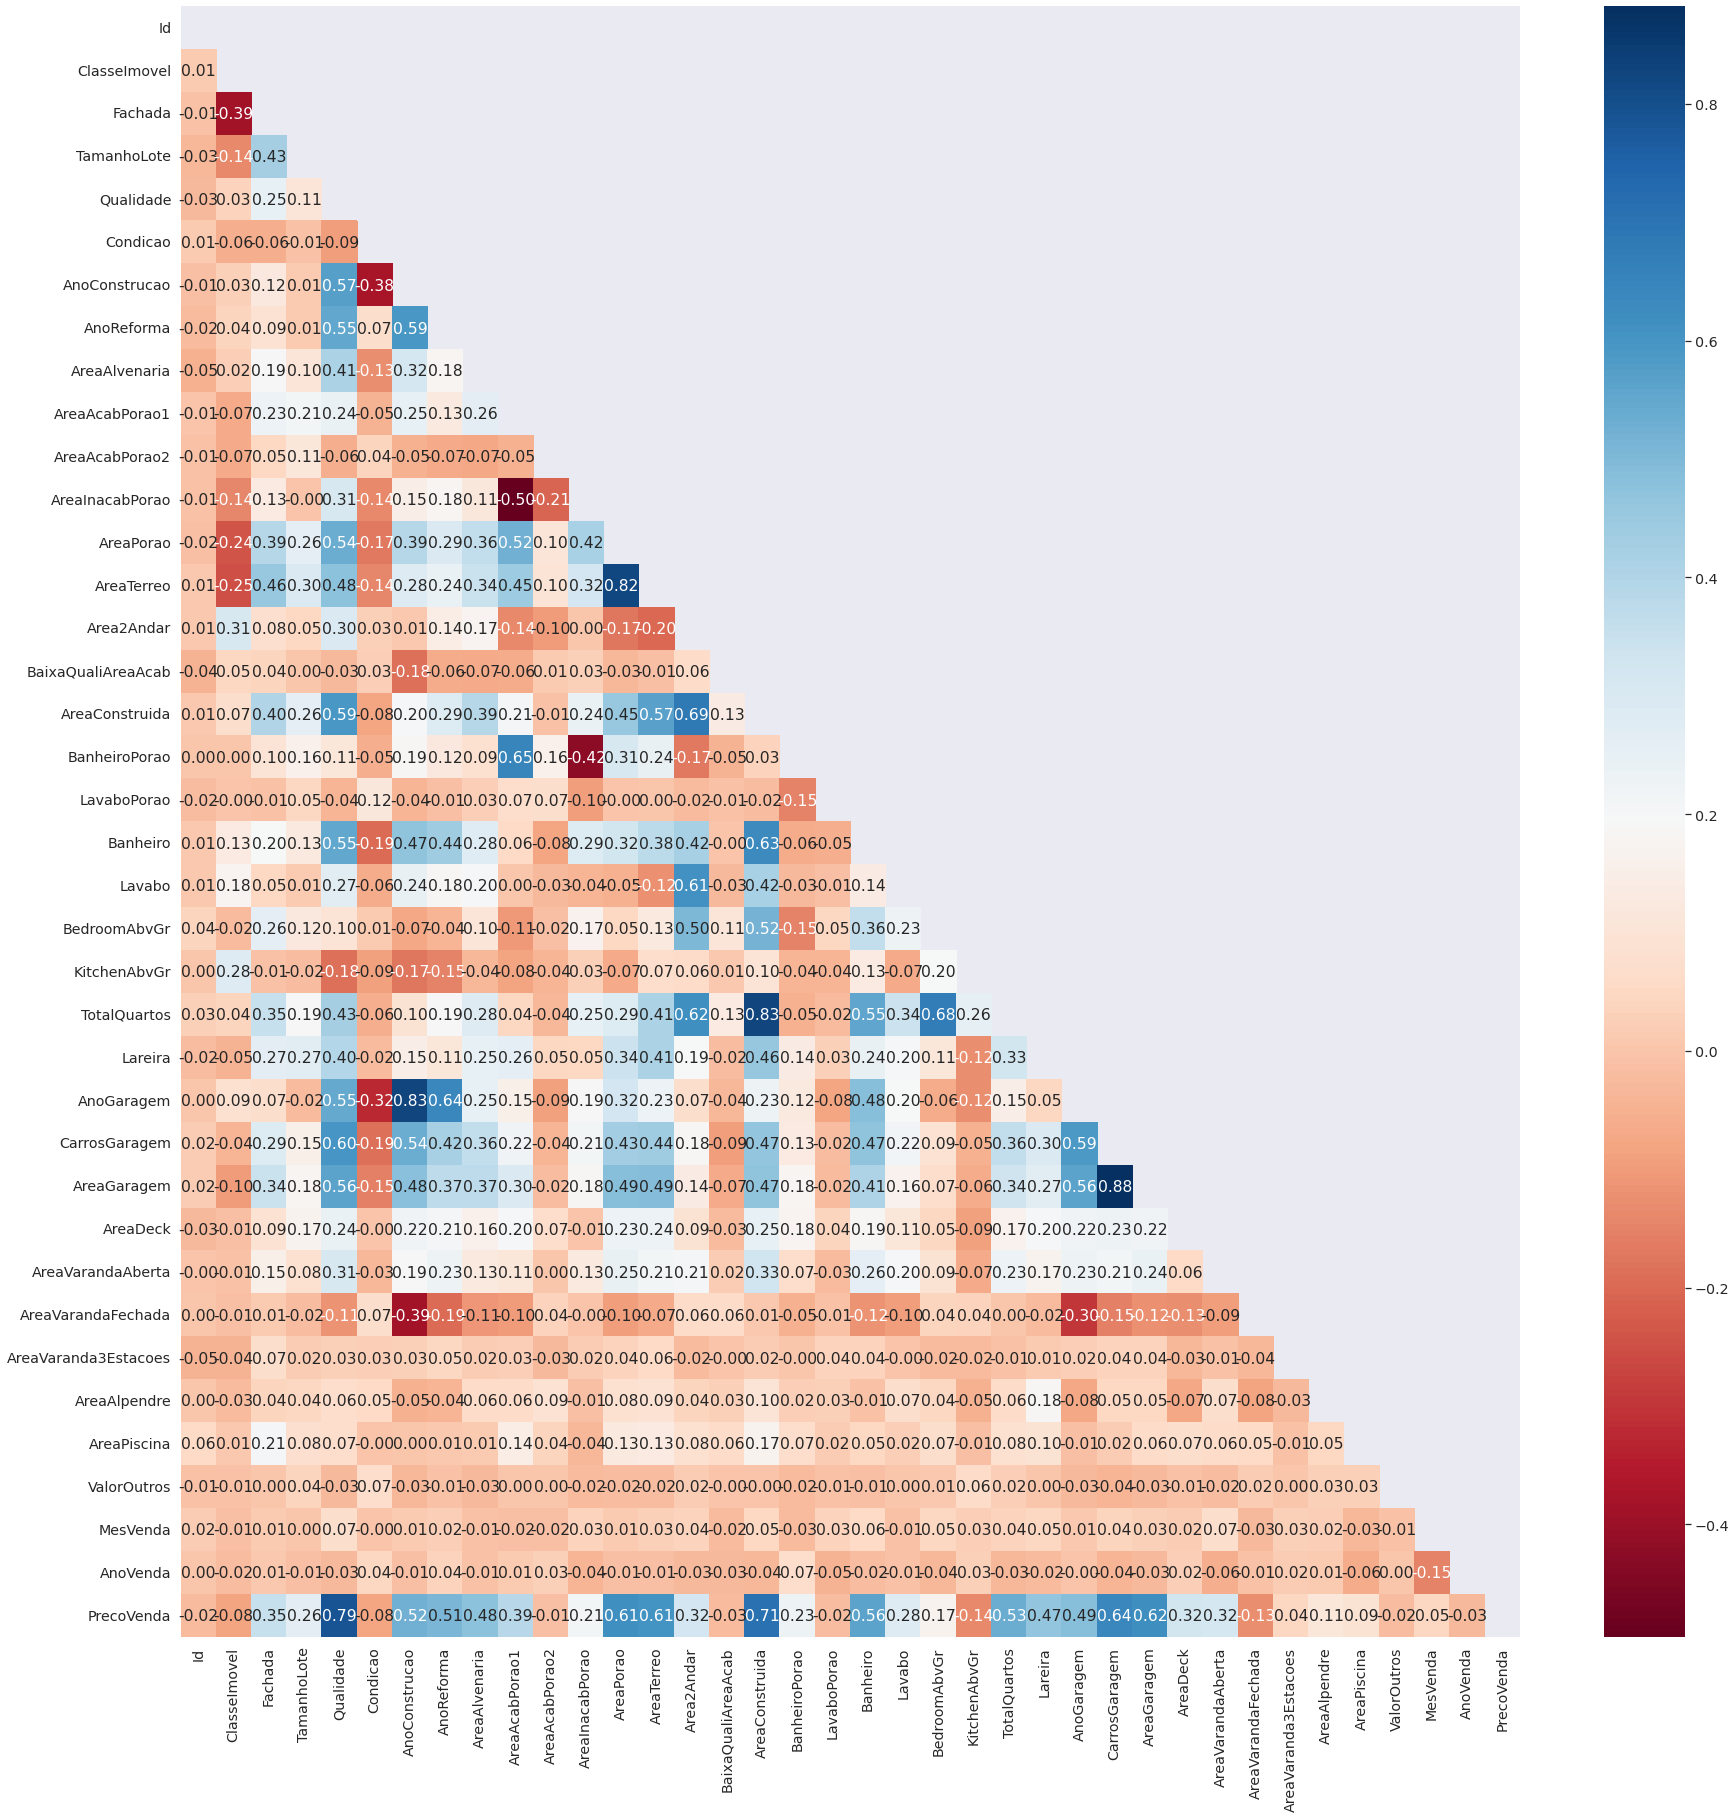

In [ ]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(30,30))
sns.heatmap(
    df.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df.corr())))
plt.show()

### Distribuição do valor de venda com as diferentes variáveis

Vou utilizar as variáveis Qualidade, AreaConstruida, CarrosGaragem, AnoConstrucao, Banheiro, TotalQuartos e ClasseZona

* PrecoVenda e Qualidade

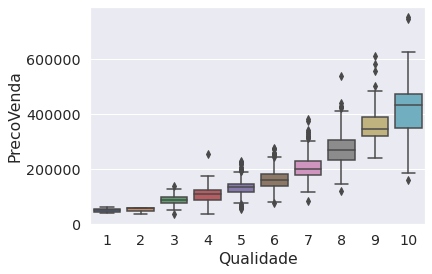

In [ ]:
sns.boxplot(df['Qualidade'], df['PrecoVenda'])
plt.show()

Pode-se perceber que as casas com maiores valores de venda tem as maiores notas de qualidade. Inclusive, a casa mais cara tem nota 10 em qualidade, o que pode justificar o preço dela. Entretando, as casas com nota 10 possuem a maior variação de preços.

* PrecoVenda e AreaConstruida

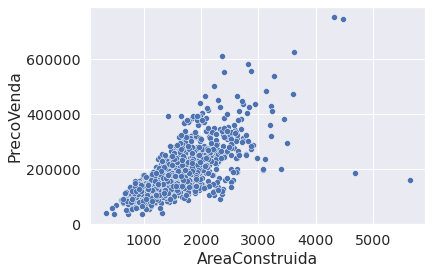

In [ ]:
sns.scatterplot(df['AreaConstruida'], df['PrecoVenda'])
plt.show()

Pelo gráfico acima e pela correlação apresentada pela matriz de correlação (0.71), nota-se que casas com maior valor de área construída tendem a ter um preço maior. Entretanto, pode-se notar que os dois imóveis com maior área construída tem um valor próximo ao da média (R$180921.19).

* PrecoVenda e CarrosGaragem

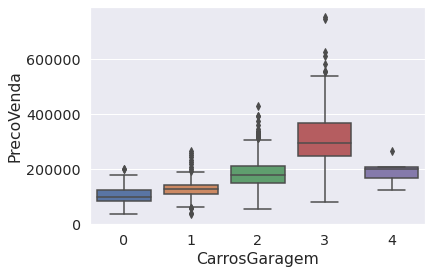

In [ ]:
sns.boxplot(df['CarrosGaragem'], df['PrecoVenda'])
plt.show()

Pode-se notar que os imóveis que contém garagens com espaço para 3 carros chegam a ter os maiores valores de venda. Porém, estes imóveis também contém a maior variação de preços.

* PrecoVenda e AnoConstrucao

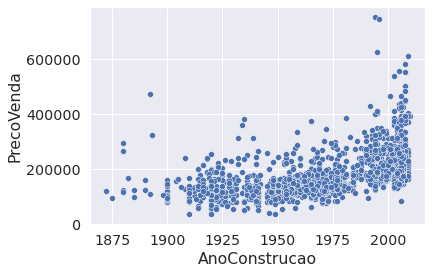

In [ ]:
sns.scatterplot(df['AnoConstrucao'], df['PrecoVenda'])
plt.show()

Pelo gráfico e pela matriz de correlação (0.52), pode-se perceber que há uma certa correlação entre a idade da casa e o preço de venda. Casas mais novas parecem ter maior valor de venda.

* PrecoVenda e Banheiro

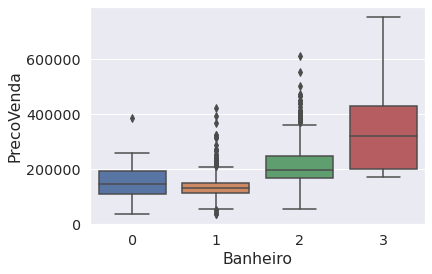

In [ ]:
sns.boxplot(df['Banheiro'], df['PrecoVenda'])
plt.show()

Pode-se perceber que casas com 3 banheiros tem maior valor de venda, apesar de ter uma maior variação de preços.

* PrecoVenda e TotalQuartos

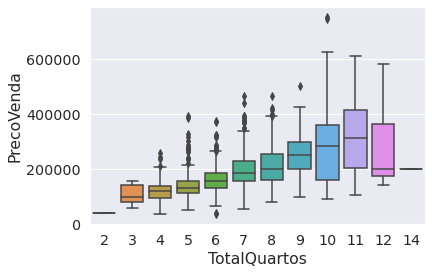

In [ ]:
sns.boxplot(df['TotalQuartos'], df['PrecoVenda'])
plt.show()

Imóveis com 11 quartos possuem em geral maiores preços, mas há imóveis com 10 quartos que possuem o maior valor de venda.

* PrecoVenda e ClasseZona

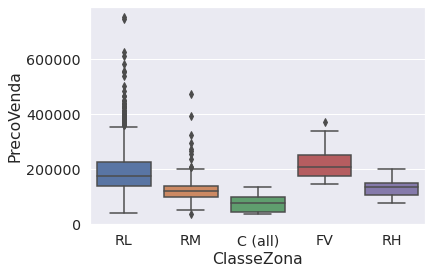

In [ ]:
sns.boxplot(df['ClasseZona'], df['PrecoVenda'])
plt.show()

Percebe-se que os imóveis da zona FV (Vila de flutuação Residencial) tem maiores valores gerais de venda, pq tem a mediana mais elevada. Porém, existem imóveis da zona RL (Residencial Baixa densidade) que são mais caras. Essa zona pode conter imóveis mais espaçados de pessoas mais ricas.

### **Insight:**

Características das casas mais valiosas:
* Nota 10 de qualidade
* Área construída entre 3000 e 4500
* Espaço para 3 carros na garagem
* Construídas mais recentemente
* 3 banheiros
* 11 quartos
* Zona FV

###  Pré-Preprocessamento, limpeza dos dados, construção de features

### Número de valores faltantes

In [ ]:
#O Colab limita em 10 os atributos que aparecem quando uso .isnull(), por isso resolvi imprimir os atributos que possuem valores nulos.
nulos = df.isnull().sum().to_frame()
for index, row in nulos.iterrows():
    #print(index, row[0])
    if (row[0] != 0):
      print('{}: {}'.format(index, row[0]))

Fachada: 259
Beco: 1369
TipoAlvenaria: 8
AreaAlvenaria: 8
AlturaPorao: 37
CondicaoPorao: 37
ParedePorao: 38
TipoAcabPorao1: 37
TipoAcabPorao2: 38
InstalacaoEletrica: 1
QualdiadeLareira: 690
LocalGaragem: 81
AnoGaragem: 81
AcabamentoGaragem: 81
QualidadeGaragem: 81
CondicaoGaragem: 81
QualidadePiscina: 1453
QualidadeCerca: 1179
Outros: 1406


Preenchendo os valores faltantes com a mediana das colunas

In [ ]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

Id               0
ClasseImovel     0
ClasseZona       0
Fachada          0
TamanhoLote      0
                ..
MesVenda         0
AnoVenda         0
TipoVenda        0
CondicaoVenda    0
PrecoVenda       0
Length: 81, dtype: int64

### Construção de features

In [ ]:
df['quarto_por_area'] = df['TotalQuartos'] / df['AreaConstruida']
df['quarto_por_area'] 

0       0.004678
1       0.004754
2       0.003359
3       0.004077
4       0.004095
          ...   
1455    0.004250
1456    0.003377
1457    0.003846
1458    0.004638
1459    0.004777
Name: quarto_por_area, Length: 1460, dtype: float64

# **OBJETIVO 1**

### Transformação logarítmica na variável PrecoVenda

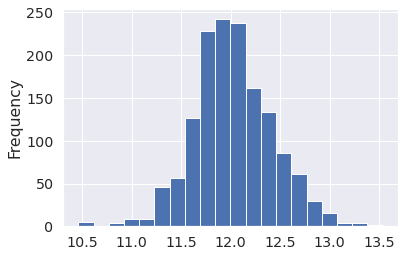

In [ ]:
# aplicando o LOG na série de dados de PrecoVenda e plotando uma distribuição
df['PrecoVendaLog'] = np.log(df['PrecoVenda'])
df['PrecoVendaLog'].plot.hist(bins=20)

### Selecionando 6 features para o modelo:

Banheiro, AnoConstrucao, quarto_por_area, Qualidade, Condicao, CarrosGaragem

Utilizando a lib statsmodel para fitar a regressão linear:

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='PrecoVendaLog ~ Banheiro + AnoConstrucao + quarto_por_area + Qualidade + Condicao + CarrosGaragem', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PrecoVendaLog   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     868.3
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:                 380.38
No. Observations:                1460   AIC:                            -746.8
Df Residuals:                    1453   BIC:                            -709.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8789      0.437     15.734      0.000       6.021       7.736
Banheiro            0.0863      0.011      7.632      0.000       0.064       0.109
AnoConstrucao       0.0021      0.000      9.206      0.000       0.002       0.003
quarto_por_area   -85.4232      6.959    -12.274      0.000     -99.075     -71.772
Qualidade           0.1286      0.005     24.000      0.000       0.118       0.139
Condicao            0.0533      0.005     11.010      0.000       0.044       0.063
CarrosGaragem       0.1222      0.009     13.992      0.000       0.105       0.139
==============================================================================
Omnibus:                       99.726   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.690
Skew:                          -0.371   Prob(JB):                     6.70e-57
Kurtosis:                       4.924   Cond. No.                     2.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretação do R²

O R² deu 0.782, isso significa que o modelo consegue explicar 78,2% dos dados que ele utiliza.